# **Task-1: Simple Linear Regression (Single Feature)**

## DATA RETRIEVAL AND COLLECTION

In [221]:
import pandas as pd

data = pd.read_csv("./housing.csv")
print("Data loaded successfully!")
    
    # Display basic information
print(f"\nDataset Shape: {data.shape}")
print(f"   - Rows (samples): {data.shape[0]}")
print(f"   - Columns (features): {data.shape[1]}")
    
print(f"\nColumn Names:")
for i, col in enumerate(data.columns, 0):
        print(f"   {i}. {col}")
    
    # Display first few rows
display(data.head(10))    

Data loaded successfully!

Dataset Shape: (20640, 10)
   - Rows (samples): 20640
   - Columns (features): 10

Column Names:
   0. longitude
   1. latitude
   2. housing_median_age
   3. total_rooms
   4. total_bedrooms
   5. population
   6. households
   7. median_income
   8. median_house_value
   9. ocean_proximity


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


## DATA CLEANING

In [222]:

# Check for missing values
print("\n(i) Missing Values Count:")
print(data.isnull().sum())


(i) Missing Values Count:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [223]:
# Verify data types
print("\n(ii) Data Types:")
print(data.dtypes)


(ii) Data Types:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [224]:
print("\n(iii)Handle missing values")
initial_rows = len(data)

# Remove rows with missing values in key columns
data_cleaned = data.dropna(subset=['housing_median_age', 'median_house_value'])

rows_removed = initial_rows - len(data_cleaned)
print(f"Rows removed: {rows_removed}")
print(f"Remaining rows: {len(data_cleaned)}")



(iii)Handle missing values
Rows removed: 0
Remaining rows: 20640


## FEATURE DESIGN

Feature (X) shape: (20640, 1)
Label (Y) shape: (20640,)


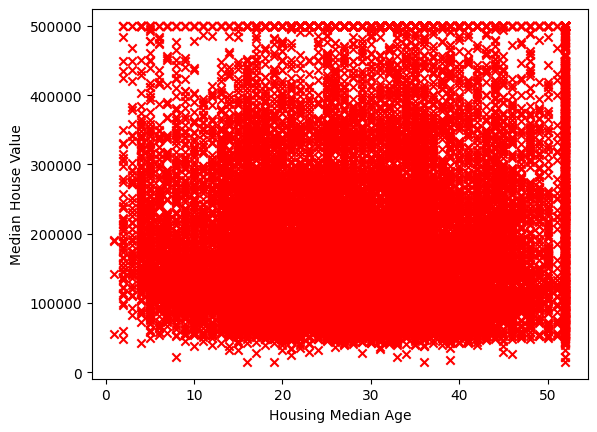

In [225]:
X = data[['housing_median_age']]   # Feature
Y = data['median_house_value']     # Target
print("Feature (X) shape:", X.shape)
print("Label (Y) shape:", Y.shape)

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X, Y, marker='x', color='red')
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.show()

Why This Feature Was Chosen?

i. Interpretability: Housing age is a single, easily understandable feature that demonstrates the fundamentals of simple linear regression clearly.

ii. Domain Relevance: The age of housing stock can influence property values in various ways:

a) Newer homes may have modern amenities and construction standards

b) Older homes in established neighborhoods may have historical value

c) Age can indicate depreciation or appreciation patterns

iii. Measurability: Housing median age is a continuous numerical variable, making it directly compatible with linear regression without transformation.

iv. Educational Value: Using a single feature allows us to visualize the relationship in 2D space and understand the fundamental concepts of:
Slope (coefficient), Intercept, Linear relationship between X and Y

## ALGORITHM SELECTION

Chosen Algorithm: Linear Regression

Linear Regression is suitable for this problem for the following reasons:

1. Continuous Target Variable

We are predicting median_house_value, which is a continuous numerical value.

Linear regression is specifically designed for continuous output prediction.

2. Single Input Feature

The task uses only housing_median_age as input.

Linear regression works well when there is one independent variable and one dependent variable.

3. Simple Relationship Modeling

We want to understand how house age affects price.

Linear regression models this using:

y=mx+c

Where:

y = predicted house price

x = housing median age

m = slope (effect of age on price)

c = intercept

4. Interpretability

The slope tells:
how much price changes for each 1-year increase in house age
Easy to explain and analyze for academic purposes.

5. Baseline Model
Linear regression provides a benchmark
Helps compare later with: multi-feature regression and advanced models



In [226]:
import numpy as np

def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

def normalize(X):
    mu = np.mean(X, axis=0)      # mean of each column
    sigma = np.std(X, axis=0)    # std of each column
    X_norm = (X - mu) / sigma
    return X_norm

def gradient_descent(x, y, iterations, alpha, *, theta = None):
    if theta is None:
        theta = np.zeros(x.shape[1])
    # this gives the no of value same as len(x) since it gives row for a np
    m = len(y)
    for i in range(iterations):
        gradient = np.matmul(x.T, np.matmul(x, theta) - y) / m
        # it seems you can alse do this
        # gradient = x.T @ (x @ theta - y) / m theese days
        if np.linalg.norm(gradient) <= 1e-6:
            break
        theta = theta - (alpha * gradient)
    return theta



## LOSS FUNCTION SELECTION

In [227]:
X = data[['housing_median_age']].values.flatten()  # Adjust column name
Y = data['median_house_value'].values

theta = np.zeros(2)
X_with_bias = np.column_stack((np.ones(len(X)), X))
y = Y

cost = compute_cost(X_with_bias, y, theta)
print('theta:', theta)
print('cost:', cost)

theta: [0. 0.]
cost: 28052415994.936264


## MODEL LEARNING (TRAINING)

theta: [99408.38815497  3301.63386325]
cost: 7097669726.458812


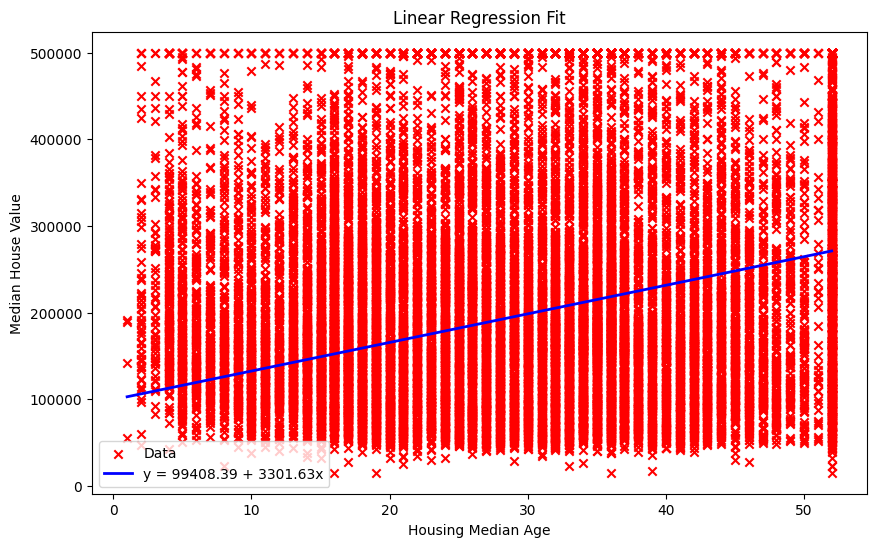

In [228]:
# Data preparation (you already did this)
X = data[['housing_median_age']].values.flatten()
Y = data['median_house_value'].values

# Add bias column
X_with_bias = np.column_stack((np.ones(len(X)), X))
y = Y

# Gradient descent function
def gradient_descent(X, y, alpha, iterations):
    theta = np.zeros(2)
    m = len(y)
    
    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])
    
    return theta

# Run gradient descent
iterations = 5000
alpha = 0.001
theta = gradient_descent(X_with_bias, y, alpha, iterations)  # ← Use X_with_bias here!
cost = compute_cost(X_with_bias, y, theta)  # ← And here!

print("theta:", theta)
print('cost:', cost)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, marker='x', color='red', alpha=1, label='Data')
x_vals = np.linspace(min(X), max(X), 80)
y_vals = theta[0] + theta[1] * x_vals
plt.plot(x_vals, y_vals, 'b-', linewidth=2, label=f'y = {theta[0]:.2f} + {theta[1]:.2f}x')
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.legend()
plt.title('Linear Regression Fit')
plt.show()

## Intrepretation of Single Value linear regression

> What does the coefficient represent?
> - The Coefficient represents the slope of the line

> What does the intercept mean in this context?
> - The intercept usually is the value when all values are zero and can equal to the mean if the given value is mean centered.


# **Task-2: Multiple Linear Regression (All Features)**
Same as task 1 but we now use multiple data and the same generalized linear regression gradient descent function

In [229]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [230]:
data = pd.read_csv("./housing.csv")
print(f"Dataset Shape: {data.shape}")
print(f"   - Rows (samples): {data.shape[0]}")
print(f"   - Columns (features): {data.shape[1]}")

print(f"\nColumn Names:")
for i, col in enumerate(data.columns, 0):
    print(f"   {i}. {col}")

# Display first few rows
print("\nFirst 10 rows:")
display(data.head(10))

Dataset Shape: (20640, 10)
   - Rows (samples): 20640
   - Columns (features): 10

Column Names:
   0. longitude
   1. latitude
   2. housing_median_age
   3. total_rooms
   4. total_bedrooms
   5. population
   6. households
   7. median_income
   8. median_house_value
   9. ocean_proximity

First 10 rows:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [231]:

# Check for missing values
print("\n(i) Missing Values Count:")
print(data.isnull().sum())

# Verify data types
print("\n(ii) Data Types:")
print(data.dtypes)


(i) Missing Values Count:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

(ii) Data Types:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [232]:
initial_rows = len(data)
# Remove rows with missing values
data_cleaned = data.dropna()
rows_removed = initial_rows - len(data_cleaned)
print(f"\n✓ Rows removed (missing values): {rows_removed}")
print(f"✓ Remaining rows: {len(data_cleaned)}")
print(data_cleaned.isna().values.any())



✓ Rows removed (missing values): 207
✓ Remaining rows: 20433
False


In [233]:
feature_columns = [col for col in data_cleaned.columns if col != 'median_house_value']
print(f"\nFeatures selected: {feature_columns}")
print(f" Number of features: {len(feature_columns)}")

# Prepare X (features) and y (target)
X = data_cleaned[feature_columns].values
y = data_cleaned['median_house_value'].values

print(f"\n✓ Feature matrix (X) shape: {X.shape}")
print(f"✓ Target vector (y) shape: {y.shape}")


Features selected: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']
 Number of features: 9

✓ Feature matrix (X) shape: (20433, 9)
✓ Target vector (y) shape: (20433,)


In [234]:
def gradient_descent_multi(x, y, iterations, alpha, *, theta = None):
    if theta is None:
        theta = np.zeros(x.shape[1])
    # this gives the no of value same as len(x) since it gives row for a np
    m = len(y)
    for i in range(iterations):
        gradient = np.matmul(x.T, np.matmul(x, theta) - y) / m
        if np.linalg.norm(gradient) <= 1e-6:
            break

        theta = theta - (alpha * gradient)
    return theta

In [235]:
X = data_cleaned[['housing_median_age','total_rooms','total_bedrooms',
          'population','households','median_income']].values
Y = data_cleaned['median_house_value'].values#.reshape(-1,1)

# normalize
mu = X.mean(axis=0)
sigma = X.std(axis=0)
X = (X - mu) / sigma
print(data_cleaned.isna().values.any())
# add bias
X = np.column_stack((np.ones(X.shape[0]), X))

alpha = 0.1
iteration = 10000
theta = gradient_descent_multi(X, Y, iteration, alpha)

print("predicted weights:", theta)


False
predicted weights: [206864.41315519  23698.7264617  -43121.11968694  42535.16671936
 -40022.83617367  47710.98946874  90685.86264832]


## Intrepretation
> What does each coefficient represent?
> - here the coefficent represents the change in y per unit change in the respective x. it is the corelation coefficient.

> How does this model differ from the single-feature model?
> - This differs form single-feature as there are more features with each different impact on the featrure

# **Comparision**

> Which model performs better? Why does using multiple features help or hurt performance?
> - The multi variable model permorms better as it has multiple data some with better corelation some with less and it figures out the overall change in the Y ( output value ) value w.r.t the individual change in all the X( input value)

> Which model is easier to interpret?
> - The single var model is easier to interpret and you can visualize the graph for the model. as it is 2D graph which we have been working with since our childhood, has basic math.
